Data Cleaning

In [ ]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

data = pd.concat(map(pd.read_csv, ['October/17_10_2022.csv', 'October/19_10_2022.csv','October/20_10_2022.csv', 'October/21_10_2022.csv', 'October/24_10_2022.csv', 'October/25_10_2022.csv', 'October/26_10_2022.csv', 'October/28_10_2022.csv', 'October/29_10_2022.csv', 
                                 'November/01_11_2022.csv', 'November/02_11_2022.csv', 'November/03_11_2022.csv', 'November/04_11_2022.csv', 'November/07_11_2022.csv', 'November/08_11_2022.csv', 'November/09_11_2022.csv', 'November/10_11_2022.csv', 'November/11_11_2022.csv', 'November/17_11_2022.csv', 'November/18_11_2022.csv', 'November/19_11_2022.csv', 'November/21_11_2022.csv', 'November/22_11_2022.csv', 'November/24_11_2022.csv', 'November/25_11_2022.csv', 'November/26_11_2022.csv', 'November/29_11_2022.csv',
                                 'December/02_12_2022.csv', 'December/05_12_2022.csv', 'December/14_12_2022.csv', 'December/15_12_2022.csv', 'December/29_12_2022.csv', 'December/30_12_2022.csv', 'December/31_12_2022.csv',
                                 'January/02_01_2023.csv', 'January/03_01_2023.csv', 'January/05_01_2023.csv', 'January/06_01_2023.csv', 'January/09_01_2023.csv', 'January/16_01_2023.csv', 'January/17_01_2023.csv', 'January/19_01_2023.csv', 'January/20_01_2023.csv', 'January/24_01_2023.csv', 'January/25_01_2023.csv', 'January/26_01_2023.csv', 'January/30_01_2023.csv', 'January/31_01_2023.csv',
                                 'February/01_02_2023.csv', 'February/03_02_2023.csv', 'February/08_02_2023.csv', 'February/17_02_2023.csv', 'February/22_02_2023.csv', 'February/23_02_2023.csv',
                                 'March/01_03_2023.csv', 'March/02_03_2023.csv', 'March/08_03_2023.csv', 'March/09_03_2023.csv', 'March/17_03_2023.csv', 'March/20_03_2023.csv', 'March/21_03_2023.csv', 'March/22_03_2023.csv', 'March/24_03_2023.csv', 'March/27_03_2023.csv', 'March/28_03_2023.csv', 'March/29_03_2023.csv', 'March/30_03_2023.csv']))

data.to_csv("Full Session.csv")

In [ ]:
data['Session Type'] = data['Session Type'].fillna(data['Session Types'])
data['Distance/min (m/min)'] = data['Distance/min (m/min)'].fillna(data['Total Distance/min (m/min)'])
data = data.drop(columns=['Session Types'])
data = data.drop(columns=['Total Distance/min (m/min)'])
data = data.drop(columns=['Name'])
data

In [40]:
# Loading of raw data
data = pd.read_csv("Full Session.csv")
data

,Unnamed: 0,Date,Activity Type,Activity Title,Session Type,Sesson Title,Start Time,End Time,Jersey No.,Position,...,Height (cm),Weight (kg),Duration (min),Total Distance (m),Distance/min (m/min),RPE,Injury,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,32,17/10/2022,Training,Recovery,Full Session,Full Session,17/10/2022 16:10,17/10/2022 16:52,47406,CB,...,189,86,40,"1,911.50",47.7,2,No,NaN,NaN,NaN
1,33,17/10/2022,Training,Recovery,Full Session,Full Session,17/10/2022 16:10,17/10/2022 17:05,47407,CB,...,188,89,55,"5,096.50",92.6,4,No,NaN,NaN,NaN
2,34,17/10/2022,Training,Recovery,Full Session,Full Session,17/10/2022 16:10,17/10/2022 17:05,47409,CM,...,186,78,55,"5,688.50",103.4,6,No,NaN,NaN,NaN
3,35,17/10/2022,Training,Recovery,Full Session,Full Session,17/10/2022 16:10,17/10/2022 16:52,47410,WF,...,185,80,40,"2,552.50",63.8,4,No,NaN,NaN,NaN
4,36,17/10/2022,Training,Recovery,Full Session,Full Session,17/10/2022 16:10,17/10/2022 16:52,47411,CAM,...,186,84,40,"2,241.80",56.0,2,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,43,30/03/2023,Training,Speed,Full Session,Full Session,30/03/2023 15:54,30/03/2023 17:56,47416,FB,...,180,82,74,"5,710.00",77.2,3,No,NaN,NaN,NaN
1057,44,30/03/2023,Training,Speed,Full Session,Full Session,30/03/2023 15:54,30/03/2023 17:56,47421,WF,...,176,69,74,"5,832.90",78.8,-,No,NaN,NaN,NaN
1058,45,30/03/2023,Training,Speed,Full Session,Full Session,30/03/2023 15:54,30/03/2023 17:56,47423,CB,...,173,78,74,"4,424.80",59.8,4,No,NaN,NaN,NaN
1059,46,30/03/2023,Training,Speed,Full Session,Full Session,30/03/2023 15:54,30/03/2023 17:56,47426,CF,...,188,82,74,"5,491.00",74.4,7,No,NaN,NaN,NaN


In [41]:
# Removing any unnecassary columns and rows that are not needed
data = data[~data['Jersey No.'].isin([47428, 47421, 47412, 47408])]
data = data.drop(['Unnamed: 0', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Activity Type', 'Session Type', 'Sesson Title', 'Start Time', 'End Time'], axis=1)
data

,Date,Activity Title,Jersey No.,Position,Age,Height (cm),Weight (kg),Duration (min),Total Distance (m),Distance/min (m/min),RPE,Injury
0,17/10/2022,Recovery,47406,CB,30,189,86,40,"1,911.50",47.7,2,No
1,17/10/2022,Recovery,47407,CB,24,188,89,55,"5,096.50",92.6,4,No
2,17/10/2022,Recovery,47409,CM,32,186,78,55,"5,688.50",103.4,6,No
3,17/10/2022,Recovery,47410,WF,29,185,80,40,"2,552.50",63.8,4,No
4,17/10/2022,Recovery,47411,CAM,25,186,84,40,"2,241.80",56.0,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1055,30/03/2023,Speed,47415,CM,27,178,75,73,"4,773.20",65.4,3,No
1056,30/03/2023,Speed,47416,FB,23,180,82,74,"5,710.00",77.2,3,No
1058,30/03/2023,Speed,47423,CB,36,173,78,74,"4,424.80",59.8,4,No
1059,30/03/2023,Speed,47426,CF,23,188,82,74,"5,491.00",74.4,7,No


In [42]:
# Setting RPE and Total Distance as data type - Float
data["Total Distance (m)"] = data["Total Distance (m)"].str.replace(",", "").astype(float)
data['RPE'] = data['RPE'].astype(float)

print(data.dtypes)

Date                     object
Activity Title           object
Jersey No.                int64
Position                 object
Age                       int64
Height (cm)               int64
Weight (kg)               int64
Duration (min)            int64
Total Distance (m)      float64
Distance/min (m/min)    float64
RPE                     float64
Injury                   object
dtype: object


In [43]:
# Creating the Training load column made out of the volume x intensity /1000. Result aslo rounded to 2 d.p.
data["Training Load"] = data["Total Distance (m)"] * data["Distance/min (m/min)"] / 1000
data["Training Load"] = data["Training Load"].round(2)
data

,Date,Activity Title,Jersey No.,Position,Age,Height (cm),Weight (kg),Duration (min),Total Distance (m),Distance/min (m/min),RPE,Injury,Training Load
0,17/10/2022,Recovery,47406,CB,30,189,86,40,1911.5,47.7,2.0,No,91.18
1,17/10/2022,Recovery,47407,CB,24,188,89,55,5096.5,92.6,4.0,No,471.94
2,17/10/2022,Recovery,47409,CM,32,186,78,55,5688.5,103.4,6.0,No,588.19
3,17/10/2022,Recovery,47410,WF,29,185,80,40,2552.5,63.8,4.0,No,162.85
4,17/10/2022,Recovery,47411,CAM,25,186,84,40,2241.8,56.0,2.0,No,125.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,30/03/2023,Speed,47415,CM,27,178,75,73,4773.2,65.4,3.0,No,312.17
1056,30/03/2023,Speed,47416,FB,23,180,82,74,5710.0,77.2,3.0,No,440.81
1058,30/03/2023,Speed,47423,CB,36,173,78,74,4424.8,59.8,4.0,No,264.60
1059,30/03/2023,Speed,47426,CF,23,188,82,74,5491.0,74.4,7.0,No,408.53


In [44]:
# Setting Injury column to binary (No: 0), (Yes: 1)
data['Injury'] = data['Injury'].map({'No': 0, 'Yes': 1})


In [45]:
# Overview of the data
data.describe()

,Jersey No.,Age,Height (cm),Weight (kg),Duration (min),Total Distance (m),Distance/min (m/min),RPE,Injury,Training Load
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,47416.368034,28.360673,179.889590,78.617245,65.026288,4565.879895,69.561146,4.502629,0.017876,335.813396
std,6.798699,3.826678,7.766013,6.638855,14.341120,1528.691136,15.575569,1.842694,0.132570,172.876574
min,47406.000000,23.000000,164.000000,65.000000,9.000000,65.500000,4.000000,1.000000,0.000000,0.330000
25%,47410.000000,25.000000,173.000000,75.000000,57.000000,3539.400000,61.000000,3.000000,0.000000,215.215000
50%,47415.000000,29.000000,181.000000,80.000000,63.000000,4336.300000,68.100000,4.000000,0.000000,298.270000
75%,47423.000000,30.000000,186.000000,82.000000,76.000000,5698.900000,78.550000,6.000000,0.000000,431.455000
max,47427.000000,36.000000,189.000000,89.000000,96.000000,9062.900000,131.100000,9.000000,1.000000,993.290000


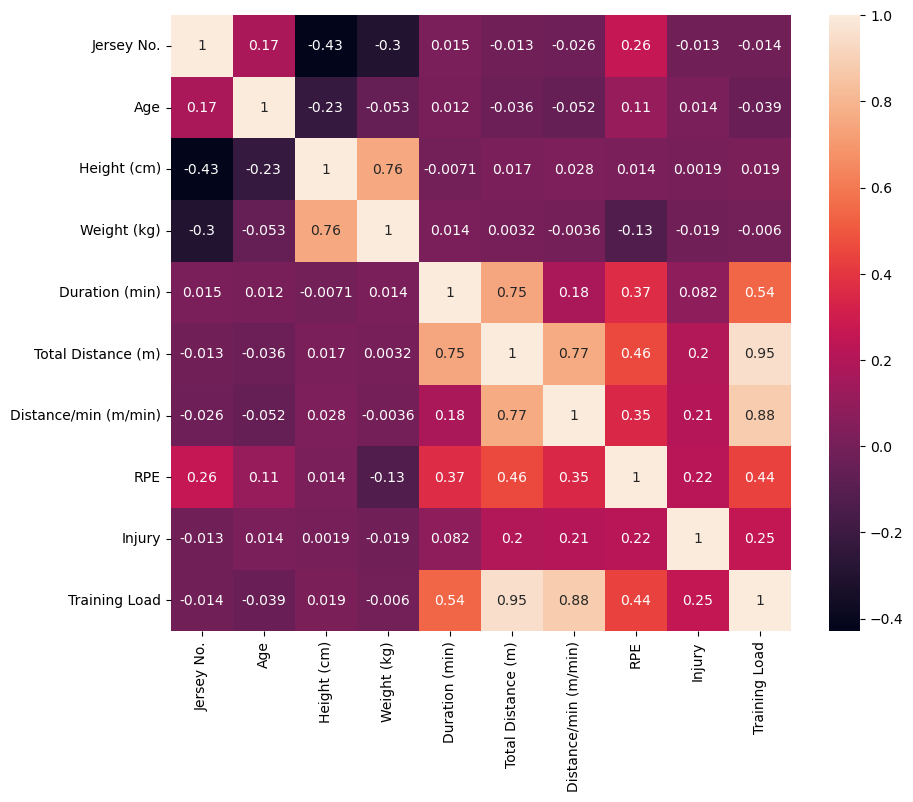

In [46]:
# Correlation Matrix between the features
cor = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True)
plt.show()

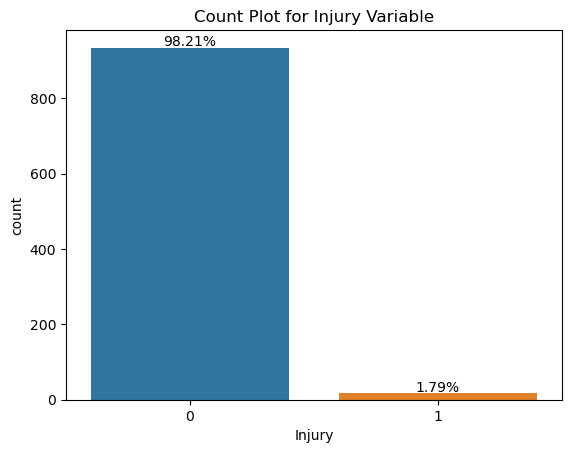

In [47]:
# Bar Chart showing the percentage of Yes and No Injuries in the data set
plt.title("Count Plot for Injury Variable")
sns.countplot(x='Injury', data=data)
ax = plt.gca()
total = len(data['Injury'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height/total:.2%}', ha='center')

plt.show()

In [48]:
# Set Jersey No. as index
data['Jersey No.'].value_counts()
data = data.set_index('Jersey No.')

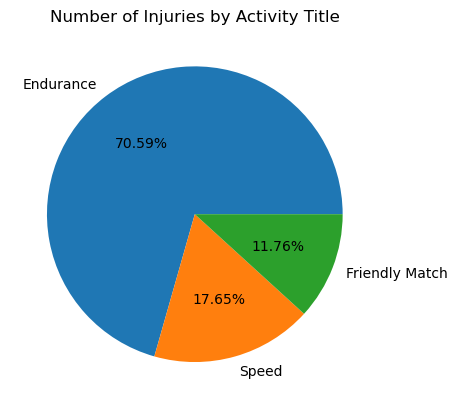

In [49]:
# Pie Chart showing how the injuries are split by activtiy title
injury_counts = data[data['Injury'] == 1]['Activity Title'].value_counts()

plt.title("Number of Injuries by Activity Title")
plt.pie(injury_counts, labels=injury_counts.index, autopct='%1.2f%%')
plt.show()

Model Evaluation

In [50]:
# Saving file 
data.to_csv("data.csv")

Random Forest (RF)

Best hyperparameters: {'class_weight': None, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
0.9895104895104895


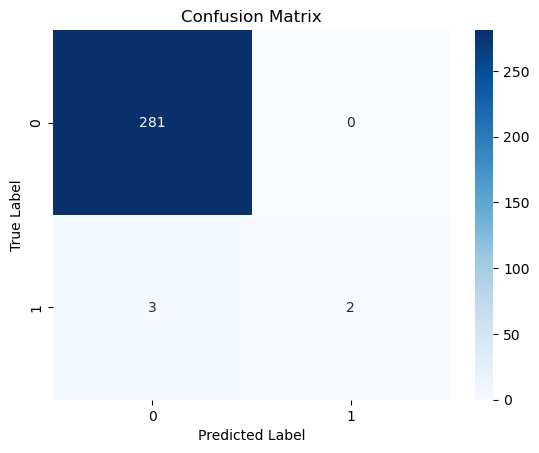

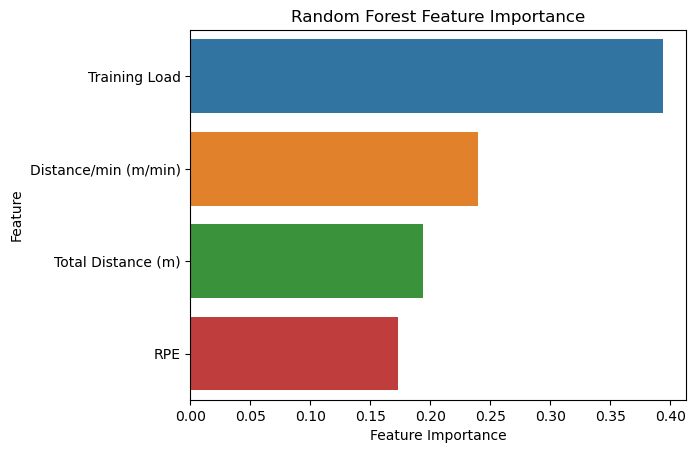

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       281
           1       1.00      0.40      0.57         5

    accuracy                           0.99       286
   macro avg       0.99      0.70      0.78       286
weighted avg       0.99      0.99      0.99       286



In [51]:
#Running the model with 4 Feautres
data = pd.read_csv("data.csv")

# Define target (y) and features (x)
# All features ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]
target_col = "Injury"
feature_cols = ["Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]

X = data[feature_cols]
y = data[target_col]

# Split data into training and test sets using stratified sampling on the 'Injury' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Random forest classifier object
rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'class_weight': ["balanced", None],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ["sqrt", "log2", None]
}

# Grid search and 10 fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Use best params for model
rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    class_weight=grid_search.best_params_['class_weight'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# Fit the model (Training)
rf.fit(X_train, y_train)

# Predictions (Test)
y_pred = rf.predict(X_test)

# Accuracy (AUC)
print(accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'Feature': feature_cols, 'Importance': rf.feature_importances_})
feature_importance.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x='Importance',y='Feature', data=feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)

Best hyperparameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.986013986013986


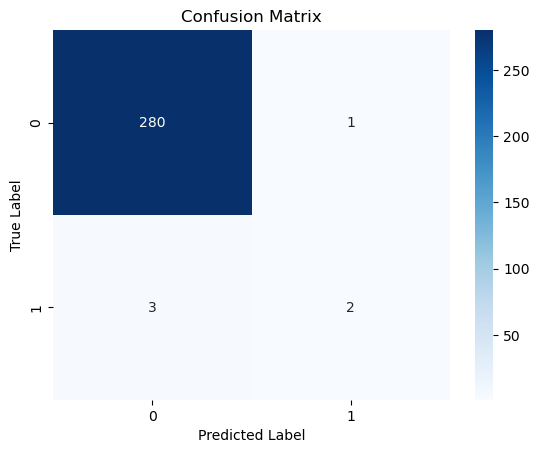

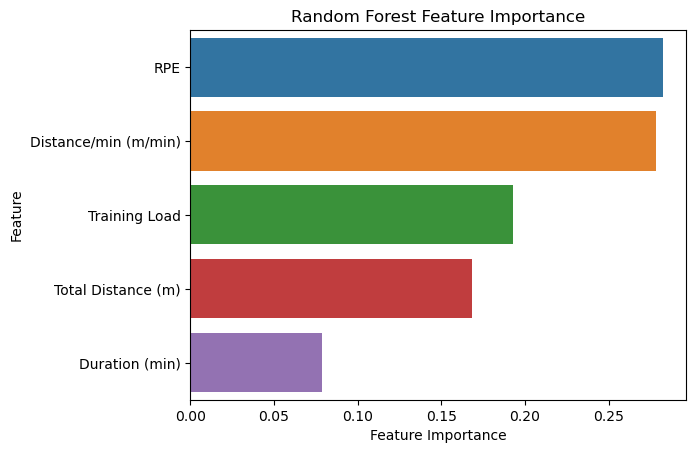

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       281
           1       0.67      0.40      0.50         5

    accuracy                           0.99       286
   macro avg       0.83      0.70      0.75       286
weighted avg       0.98      0.99      0.98       286



In [52]:
#Running the model with 5 Feautres
data = pd.read_csv("data.csv")

# Define target (y) and features (x)
# All features ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]
target_col = "Injury"
feature_cols = ["Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]

X = data[feature_cols]
y = data[target_col]

# Split data into training and test sets using stratified sampling on the 'Injury' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Random forest classifier object
rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'class_weight': ["balanced", None],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ["sqrt", "log2", None]
}

# Grid search and 10 fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Use best params for model
rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    class_weight=grid_search.best_params_['class_weight'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# Fit the model (Training)
rf.fit(X_train, y_train)

# Predictions (Test)
y_pred = rf.predict(X_test)

# Accuracy (AUC)
print(accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'Feature': feature_cols, 'Importance': rf.feature_importances_})
feature_importance.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x='Importance',y='Feature', data=feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)

Best hyperparameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.986013986013986


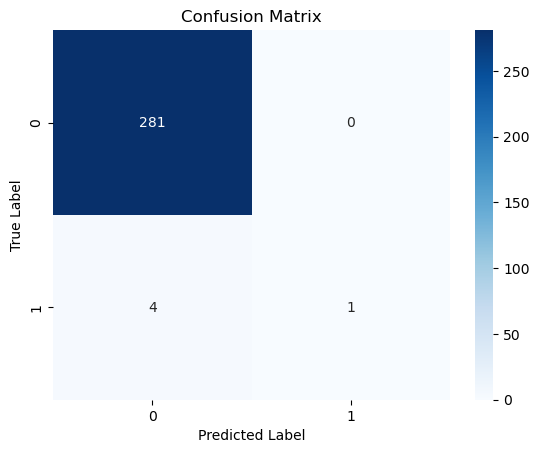

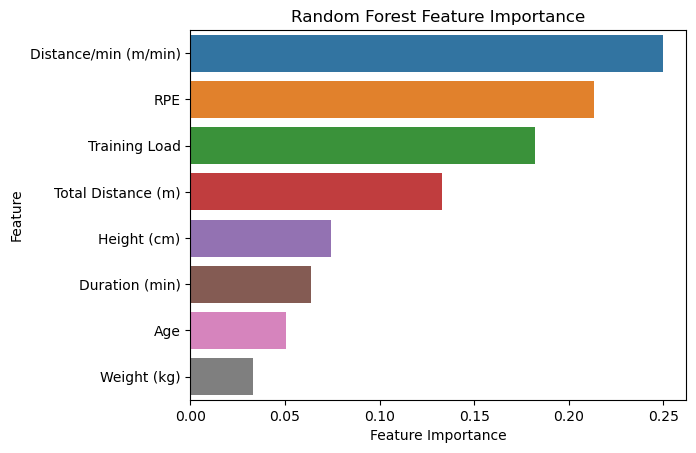

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       281
           1       1.00      0.20      0.33         5

    accuracy                           0.99       286
   macro avg       0.99      0.60      0.66       286
weighted avg       0.99      0.99      0.98       286



In [53]:
#Running the model with ALL Feautres
data = pd.read_csv("data.csv")

# Define target (y) and features (x)
# All features ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]
target_col = "Injury"
feature_cols = ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]

X = data[feature_cols]
y = data[target_col]

# Split data into training and test sets using stratified sampling on the 'Injury' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Random forest classifier object
rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'class_weight': ["balanced", None],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ["sqrt", "log2", None]
}

# Grid search and 10 fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Use best params for model
rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    class_weight=grid_search.best_params_['class_weight'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# Fit the model (Training)
rf.fit(X_train, y_train)

# Predictions (Test)
y_pred = rf.predict(X_test)

# Accuracy (AUC)
print(accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'Feature': feature_cols, 'Importance': rf.feature_importances_})
feature_importance.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x='Importance',y='Feature', data=feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)

Support Vector Machines (SVM)

Best hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
0.9825174825174825


c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


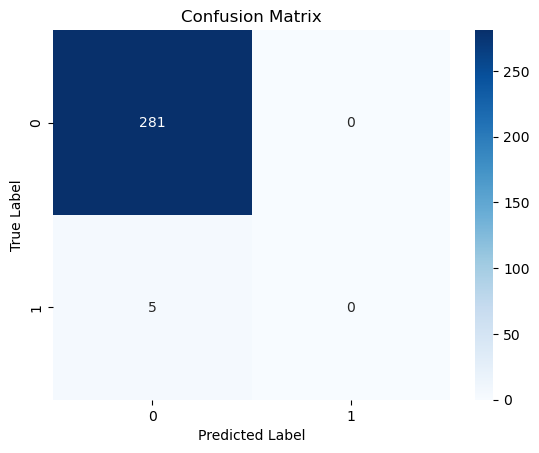

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       281
           1       0.00      0.00      0.00         5

    accuracy                           0.98       286
   macro avg       0.49      0.50      0.50       286
weighted avg       0.97      0.98      0.97       286



c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# Running the model with 4 features
data = pd.read_csv("data.csv")

# Define target (y) and features (x)
# All features ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]
target_col = "Injury"
feature_cols = ["Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]

X = data[feature_cols]
y = data[target_col]

# Split data into training and test sets using stratified sampling on the 'Injury' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Support Vector classifier object with max iterations set to 1000
svm = SVC(random_state=42, max_iter=1000)  

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10],
    'class_weight': ['balanced', None]
}

# Grid search and 10 fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Use best params for model
svm = SVC(
    C=grid_search.best_params_['C'],
    kernel=grid_search.best_params_['kernel'],
    gamma=grid_search.best_params_['gamma'],
    class_weight=grid_search.best_params_['class_weight'],
    random_state=42,
    max_iter=1000
)

# Fit the model (Training)
svm.fit(X_train, y_train)

# Predictions (Test)
y_pred = svm.predict(X_test)

# Accuracy (AUC)
print(accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)

Best hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
0.9825174825174825


c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


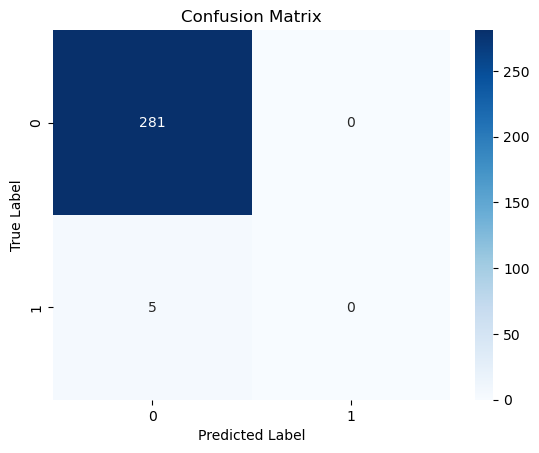

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       281
           1       0.00      0.00      0.00         5

    accuracy                           0.98       286
   macro avg       0.49      0.50      0.50       286
weighted avg       0.97      0.98      0.97       286



c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
# Running the model with 5 features
data = pd.read_csv("data.csv")

# Define target (y) and features (x)
# All features ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]
target_col = "Injury"
feature_cols = ["Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]

X = data[feature_cols]
y = data[target_col]

# Split data into training and test sets using stratified sampling on the 'Injury' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Support Vector classifier object with max iterations set to 1000
svm = SVC(random_state=42, max_iter=1000)  

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10],
    'class_weight': ['balanced', None]
}

# Grid search and 10 fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Use best params for model
svm = SVC(
    C=grid_search.best_params_['C'],
    kernel=grid_search.best_params_['kernel'],
    gamma=grid_search.best_params_['gamma'],
    class_weight=grid_search.best_params_['class_weight'],
    random_state=42,
    max_iter=1000
)

# Fit the model (Training)
svm.fit(X_train, y_train)

# Predictions (Test)
y_pred = svm.predict(X_test)

# Accuracy (AUC)
print(accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)

c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
0.9825174825174825


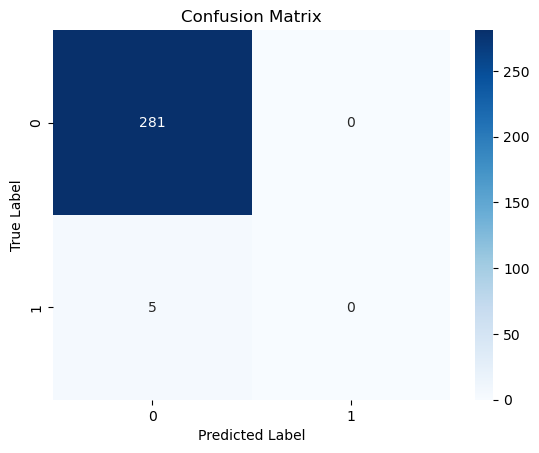

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       281
           1       0.00      0.00      0.00         5

    accuracy                           0.98       286
   macro avg       0.49      0.50      0.50       286
weighted avg       0.97      0.98      0.97       286



c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# Running the model with ALL features
data = pd.read_csv("data.csv")

# Define target (y) and features (x)
# All features ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]
target_col = "Injury"
feature_cols = ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]

X = data[feature_cols]
y = data[target_col]

# Split data into training and test sets using stratified sampling on the 'Injury' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Support Vector classifier object with max iterations set to 1000
svm = SVC(random_state=42, max_iter=1000)  

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10],
    'class_weight': ['balanced', None]
}

# Grid search and 10 fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Use best params for model
svm = SVC(
    C=grid_search.best_params_['C'],
    kernel=grid_search.best_params_['kernel'],
    gamma=grid_search.best_params_['gamma'],
    class_weight=grid_search.best_params_['class_weight'],
    random_state=42,
    max_iter=1000
)

# Fit the model (Training)
svm.fit(X_train, y_train)

# Predictions (Test)
y_pred = svm.predict(X_test)

# Accuracy (AUC)
print(accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)

Decision Tree (DT)

Best hyperparameters: {'ccp_alpha': 0.01, 'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.986013986013986


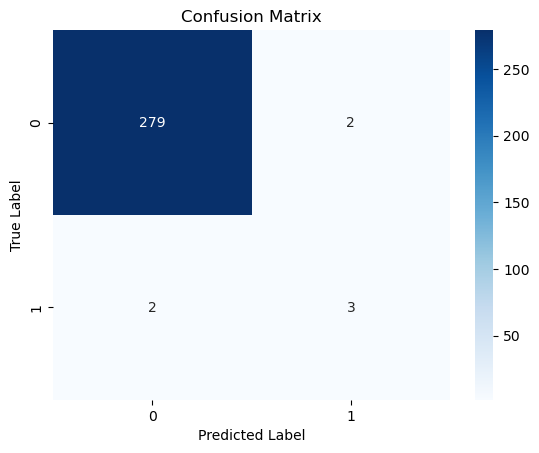

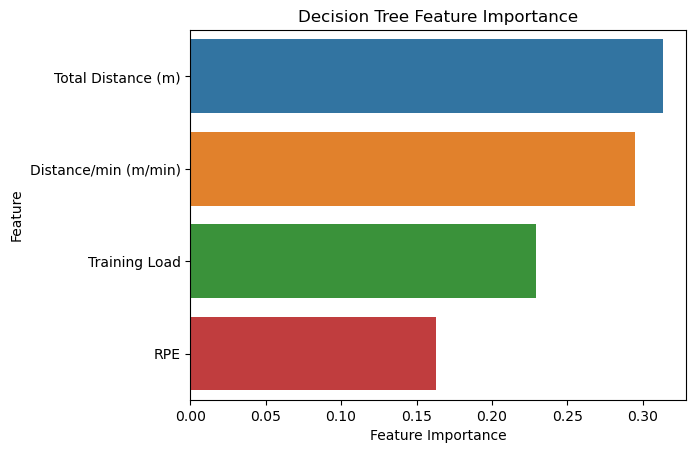

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       281
           1       0.60      0.60      0.60         5

    accuracy                           0.99       286
   macro avg       0.80      0.80      0.80       286
weighted avg       0.99      0.99      0.99       286



In [57]:
# Running the model with 4 feautres
data = pd.read_csv("data.csv")

# Define target (y) and features (x)
# All features ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]
target_col = "Injury"
feature_cols = ["Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]

X = data[feature_cols]
y = data[target_col]

# Split data into training and test sets using stratified sampling on the 'Injury' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Decision Tree classifier object with pruning
dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)  # Adjust ccp_alpha value for pruning

# Parameter grid
param_grid = {
    'class_weight': ['balanced', None],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.001, 0.01, 0.1, 1.0],  # Add ccp_alpha for pruning
    'max_features': ["sqrt", "log2", None]
}

# Grid search and 10 fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Use best params for model
dt = DecisionTreeClassifier(
    class_weight=grid_search.best_params_['class_weight'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# Fit the model (Training)
dt.fit(X_train, y_train)

# Predictions (Test)
y_pred = dt.predict(X_test)

# Accuracy (AUC)
print(accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'Feature': feature_cols, 'Importance': dt.feature_importances_})
feature_importance.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)


Best hyperparameters: {'ccp_alpha': 0.001, 'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
0.9825174825174825


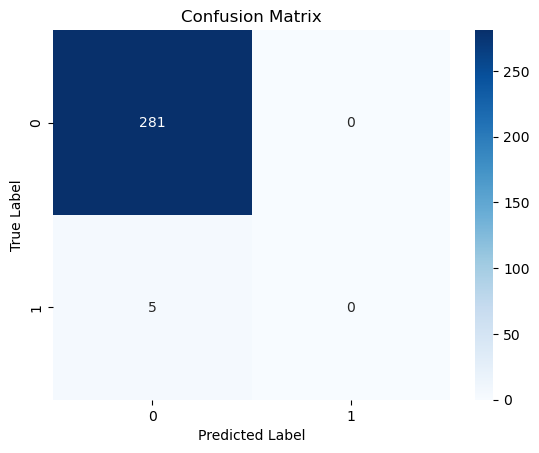

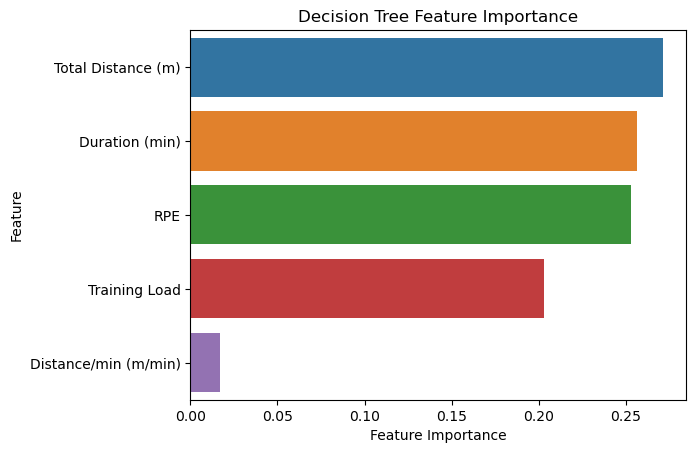

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       281
           1       0.00      0.00      0.00         5

    accuracy                           0.98       286
   macro avg       0.49      0.50      0.50       286
weighted avg       0.97      0.98      0.97       286



c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# Running the model with 5 feautres
data = pd.read_csv("data.csv")

# Define target (y) and features (x)
# All features ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]
target_col = "Injury"
feature_cols = ["Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]

X = data[feature_cols]
y = data[target_col]

# Split data into training and test sets using stratified sampling on the 'Injury' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Decision Tree classifier object with pruning
dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)  # Adjust ccp_alpha value for pruning

# Parameter grid
param_grid = {
    'class_weight': ['balanced', None],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.001, 0.01, 0.1, 1.0],  # Add ccp_alpha for pruning
    'max_features': ["sqrt", "log2", None]
}

# Grid search and 10 fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Use best params for model
dt = DecisionTreeClassifier(
    class_weight=grid_search.best_params_['class_weight'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# Fit the model (Training)
dt.fit(X_train, y_train)

# Predictions (Test)
y_pred = dt.predict(X_test)

# Accuracy (AUC)
print(accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'Feature': feature_cols, 'Importance': dt.feature_importances_})
feature_importance.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)


Best hyperparameters: {'ccp_alpha': 0.001, 'class_weight': None, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}
0.9790209790209791


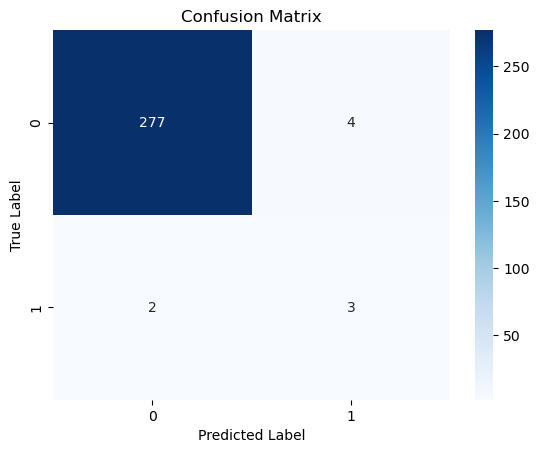

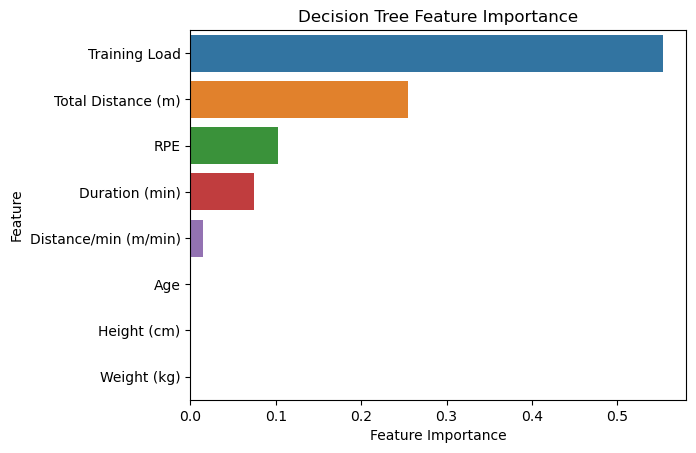

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       281
           1       0.43      0.60      0.50         5

    accuracy                           0.98       286
   macro avg       0.71      0.79      0.74       286
weighted avg       0.98      0.98      0.98       286



In [59]:
# Running the model with ALL feautres
data = pd.read_csv("data.csv")

# Define target (y) and features (x)
# All features ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]
target_col = "Injury"
feature_cols = ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]

X = data[feature_cols]
y = data[target_col]

# Split data into training and test sets using stratified sampling on the 'Injury' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Decision Tree classifier object with pruning
dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)  # Adjust ccp_alpha value for pruning

# Parameter grid
param_grid = {
    'class_weight': ['balanced', None],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.001, 0.01, 0.1, 1.0],  # Add ccp_alpha for pruning
    'max_features': ["sqrt", "log2", None]
}

# Grid search and 10 fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Use best params for model
dt = DecisionTreeClassifier(
    class_weight=grid_search.best_params_['class_weight'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# Fit the model (Training)
dt.fit(X_train, y_train)

# Predictions (Test)
y_pred = dt.predict(X_test)

# Accuracy (AUC)
print(accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'Feature': feature_cols, 'Importance': dt.feature_importances_})
feature_importance.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)


Gradient Boosting (GB)

c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4860 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\ensemble\_gb.py", line 577, in fit
    self._check_params()
  File "c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\ensemble\_gb.py", line 337, in _check_params
    check_scalar(
  File "c:\

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1}
0.9825174825174825


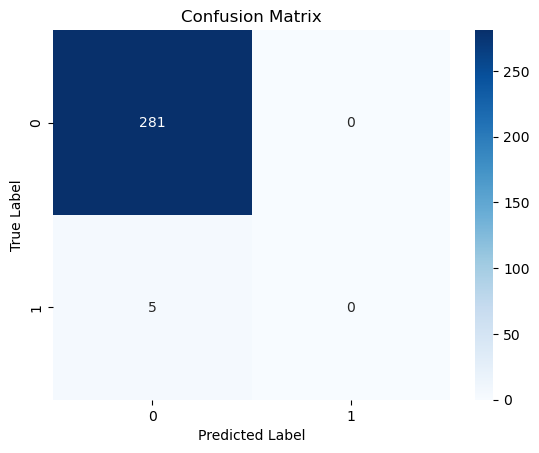

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       281
           1       0.00      0.00      0.00         5

    accuracy                           0.98       286
   macro avg       0.49      0.50      0.50       286
weighted avg       0.97      0.98      0.97       286



c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# Running the model with 4 features 
data = pd.read_csv("data.csv")

# Define target (y) and features (x)
# All features ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]
target_col = "Injury"
feature_cols = ["Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]

X = data[feature_cols]
y = data[target_col]

# Split data into training and test sets using stratified sampling on the 'Injury' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Gradient Boosting Classifier object
gb = GradientBoostingClassifier(random_state=42)

# Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'subsample': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Grid search and 10 fold cross-validation
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Use best params for model
gb = GradientBoostingClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    learning_rate=grid_search.best_params_['learning_rate'],
    max_depth=grid_search.best_params_['max_depth'],
    subsample=grid_search.best_params_['subsample'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# Fit the model (Training)
gb.fit(X_train, y_train)

# Predictions (Test)
y_pred = gb.predict(X_test)

# Accuracy (AUC)
print(accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)

c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4860 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\ensemble\_gb.py", line 577, in fit
    self._check_params()
  File "c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\ensemble\_gb.py", line 337, in _check_params
    check_scalar(
  File "c:\

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1}
0.986013986013986


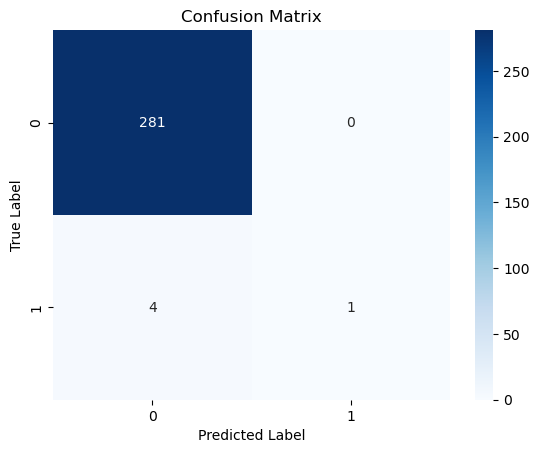

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       281
           1       1.00      0.20      0.33         5

    accuracy                           0.99       286
   macro avg       0.99      0.60      0.66       286
weighted avg       0.99      0.99      0.98       286



In [61]:
# Running the model with 5 features 
data = pd.read_csv("data.csv")

# Define target (y) and features (x)
# All features ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]
target_col = "Injury"
feature_cols = ["Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]

X = data[feature_cols]
y = data[target_col]

# Split data into training and test sets using stratified sampling on the 'Injury' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Gradient Boosting Classifier object
gb = GradientBoostingClassifier(random_state=42)

# Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'subsample': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Grid search and 10 fold cross-validation
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Use best params for model
gb = GradientBoostingClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    learning_rate=grid_search.best_params_['learning_rate'],
    max_depth=grid_search.best_params_['max_depth'],
    subsample=grid_search.best_params_['subsample'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# Fit the model (Training)
gb.fit(X_train, y_train)

# Predictions (Test)
y_pred = gb.predict(X_test)

# Accuracy (AUC)
print(accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)

c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4860 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\ensemble\_gb.py", line 577, in fit
    self._check_params()
  File "c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\ensemble\_gb.py", line 337, in _check_params
    check_scalar(
  File "c:\

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1}
0.9825174825174825


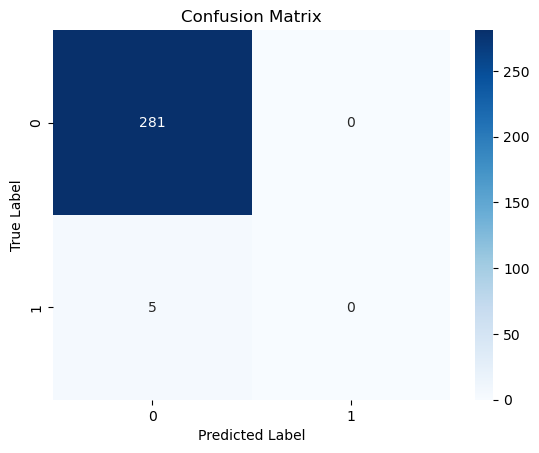

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       281
           1       0.00      0.00      0.00         5

    accuracy                           0.98       286
   macro avg       0.49      0.50      0.50       286
weighted avg       0.97      0.98      0.97       286



c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ryan Spencer\.conda\envs\aci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
# Running the model with ALL features 
data = pd.read_csv("data.csv")

# Define target (y) and features (x)
# All features ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]
target_col = "Injury"
feature_cols = ["Age", "Height (cm)", "Weight (kg)", "Duration (min)", "Total Distance (m)", "Distance/min (m/min)", "RPE", "Training Load"]

X = data[feature_cols]
y = data[target_col]

# Split data into training and test sets using stratified sampling on the 'Injury' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Gradient Boosting Classifier object
gb = GradientBoostingClassifier(random_state=42)

# Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'subsample': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Grid search and 10 fold cross-validation
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Use best params for model
gb = GradientBoostingClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    learning_rate=grid_search.best_params_['learning_rate'],
    max_depth=grid_search.best_params_['max_depth'],
    subsample=grid_search.best_params_['subsample'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# Fit the model (Training)
gb.fit(X_train, y_train)

# Predictions (Test)
y_pred = gb.predict(X_test)

# Accuracy (AUC)
print(accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)

Model Evaluation

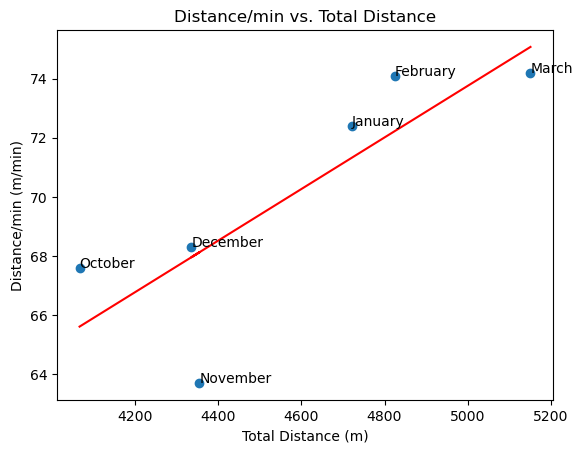

In [79]:
# Define the data
months = ['October', 'November', 'December', 'January', 'February', 'March']
total_distance = [4066.24, 4354.77, 4335.14, 4720.98, 4824.69, 5151.10]
distance_per_min = [67.6, 63.7, 68.3, 72.4, 74.1, 74.2]

# Calculate the line of best fit
slope, intercept = np.polyfit(total_distance, distance_per_min, 1)
line_of_best_fit = slope * np.array(total_distance) + intercept

# Create the scatter plot
plt.scatter(total_distance, distance_per_min)

# Add the line of best fit
plt.plot(total_distance, line_of_best_fit, color='red')

# Add labels and title
plt.xlabel('Total Distance (m)')
plt.ylabel('Distance/min (m/min)')
plt.title('Distance/min vs. Total Distance')

# ata labels for each point
for i in range(len(months)):
    plt.text(total_distance[i], distance_per_min[i], months[i])

plt.show()


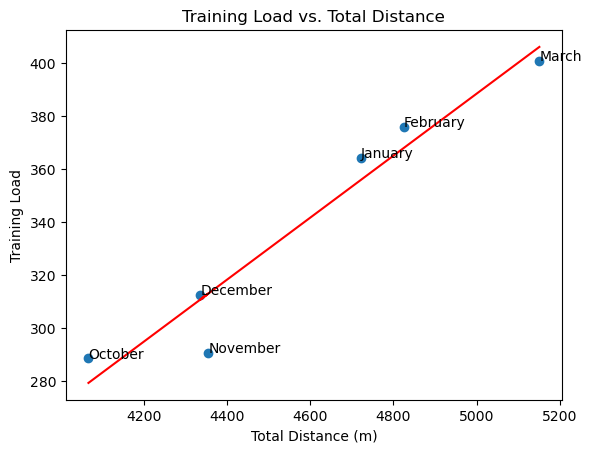

In [77]:
# Define the data
months = ['October', 'November', 'December', 'January', 'February', 'March']
total_distance = [4066.24, 4354.77, 4335.14, 4720.98, 4824.69, 5151.10]
load = [288.57, 290.62, 312.59, 364.15, 376.1, 400.97]

# Calculate the line of best fit
slope, intercept = np.polyfit(total_distance, load, 1)
line_of_best_fit = slope * np.array(total_distance) + intercept

# Create the scatter plot
plt.scatter(total_distance, load)

# Add the line of best fit
plt.plot(total_distance, line_of_best_fit, color='red')

# Add labels and title
plt.xlabel('Total Distance (m)')
plt.ylabel('Training Load')
plt.title('Training Load vs. Total Distance')

# Data labels for each point
for i in range(len(months)):
    plt.text(total_distance[i], load[i], months[i])


plt.show()

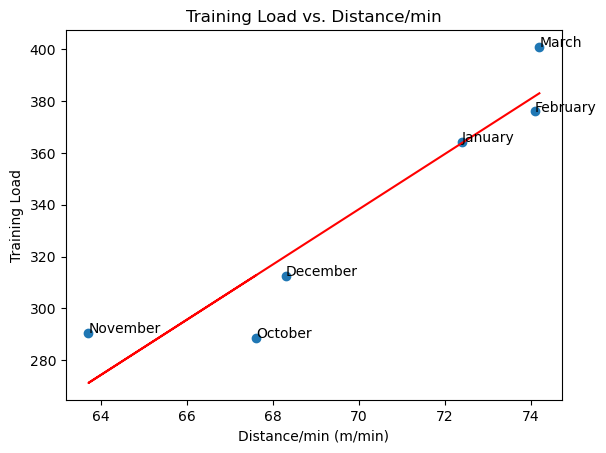

In [76]:
# Define the data
months = ['October', 'November', 'December', 'January', 'February', 'March']
intensity = [67.6, 63.7, 68.3, 72.4, 74.1, 74.2]
load = [288.57, 290.62, 312.59, 364.15, 376.1, 400.97]

# Calculate the line of best fit
slope, intercept = np.polyfit(intensity, load, 1)
line_of_best_fit = slope * np.array(intensity) + intercept

# Create the scatter plot
plt.scatter(intensity, load)

# Add the line of best fit
plt.plot(intensity, line_of_best_fit, color='red')

# Add labels and title
plt.xlabel('Distance/min (m/min)')
plt.ylabel('Training Load')
plt.title('Training Load vs. Distance/min')

# Data labels for each point
for i in range(len(months)):
    plt.text(intensity[i], load[i], months[i])

plt.show()

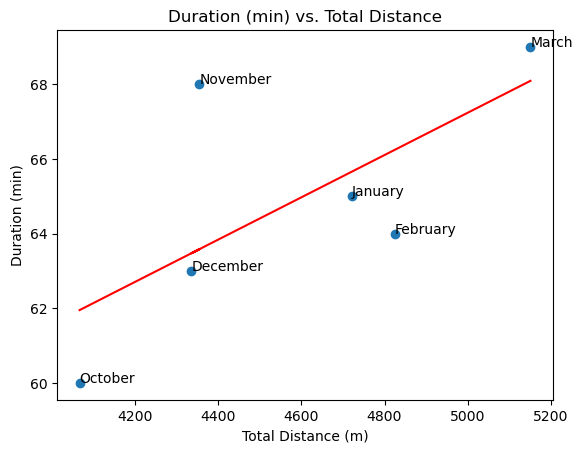

In [75]:
# Define the data
months = ['October', 'November', 'December', 'January', 'February', 'March']
total_distance = [4066.24, 4354.77, 4335.14, 4720.98, 4824.69, 5151.10]
duration = [60, 68, 63, 65, 64, 69]

# Calculate the line of best fit
slope, intercept = np.polyfit(total_distance, duration, 1)
line_of_best_fit = slope * np.array(total_distance) + intercept

# Create the scatter plot
plt.scatter(total_distance, duration)

# Add the line of best fit
plt.plot(total_distance, line_of_best_fit, color='red')

# Add labels and title
plt.xlabel('Total Distance (m)')
plt.ylabel('Duration (min)')
plt.title('Duration (min) vs. Total Distance')

# Add data labels for each point
for i in range(len(months)):
    plt.text(total_distance[i], duration[i], months[i])

plt.show()

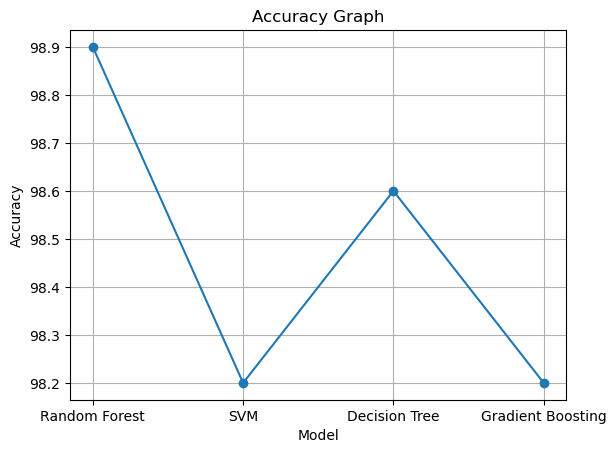

In [20]:

# Accuracy calues
accuracy_values = [98.9, 98.2, 98.6, 98.2]

# Models
x_values = ['Random Forest', 'SVM', 'Decision Tree', 'Gradient Boosting']

# Plot the accuracy graph
plt.plot(x_values, accuracy_values, marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.grid(True)
plt.show()

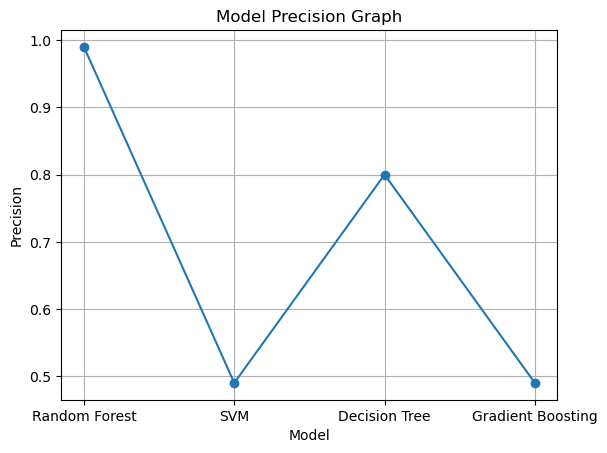

In [29]:

# PRecision Values
accuracy_values = [0.99, 0.49, 0.80, 0.49]

# Models
x_values = ['Random Forest', 'SVM',  'Decision Tree', 'Gradient Boosting']

# Plot the precision graph
plt.plot(x_values, accuracy_values, marker='o')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Precision Graph')
plt.grid(True)
plt.show()

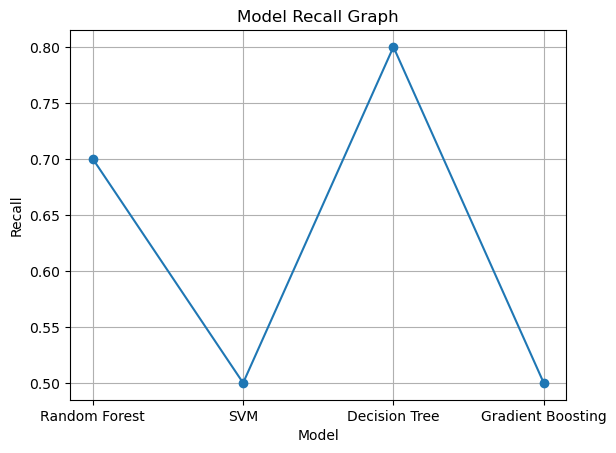

In [43]:
# Recall Values
accuracy_values = [0.70, 0.50, 0.80, 0.50]

# Models
x_values = ['Random Forest', 'SVM',  'Decision Tree', 'Gradient Boosting']

# Plot the recall graph
plt.plot(x_values, accuracy_values, marker='o')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Model Recall Graph')
plt.grid(True)

plt.show()

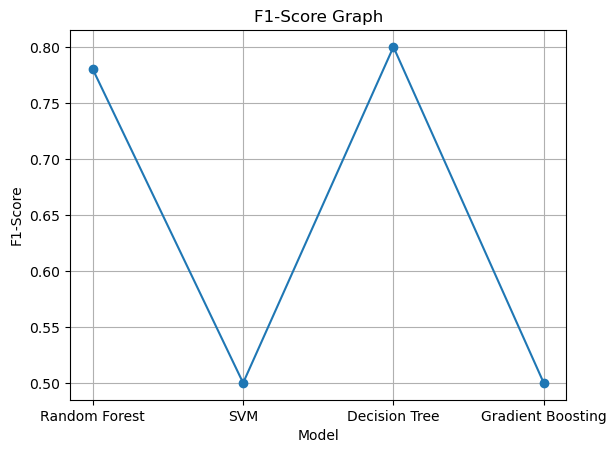

In [44]:
# F1-Score Values
accuracy_values = [0.78, 0.50, 0.80, 0.50]

# Models
x_values = ['Random Forest', 'SVM',  'Decision Tree', 'Gradient Boosting']

# Plot the f1-score graph
plt.plot(x_values, accuracy_values, marker='o')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score Graph')
plt.grid(True)

plt.show()

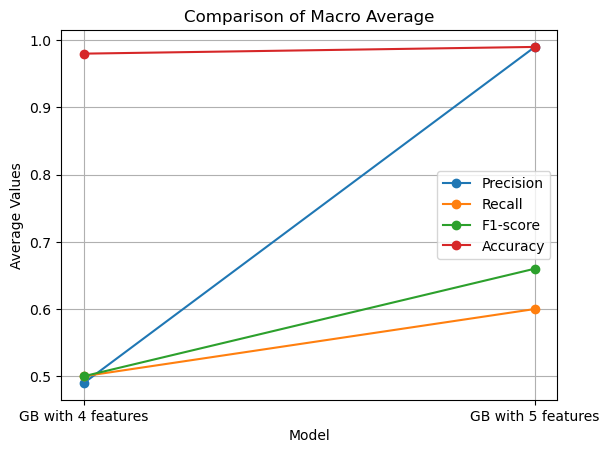

In [60]:
# Compare gb models with 4 feauters against 5 features
# Values
gb1_prec = 0.49
gb2_prec = 0.99
gb1_re = 0.50
gb2_re = 0.60
gb1_f1 = 0.50
gb2_f1 = 0.66
gb1_acc = 0.98
gb2_acc = 0.99

# X-axis values
x = ['GB with 4 features', 'GB with 5 features']

# Y-axis values
precision = [gb1_prec, gb2_prec]
recall = [gb1_re, gb2_re]
f1_score = [gb1_f1, gb2_f1]
accuracy = [gb1_acc, gb2_acc]

# Line chart for precision
plt.plot(x, precision, label='Precision', marker='o')
# Line chart for recall
plt.plot(x, recall, label='Recall', marker='o')
# Line chart for F1-score
plt.plot(x, f1_score, label='F1-score', marker='o')
# Line chart for accuracy
plt.plot(x, accuracy, label='Accuracy', marker='o')

plt.xlabel('Model')
plt.ylabel('Average Values')
plt.title('Comparison of Macro Average')
plt.legend()
plt.grid(True)
plt.show()